In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
import io
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

from time import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage
def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

In [5]:
klumba = cv2.imread('Klumba.jpg')

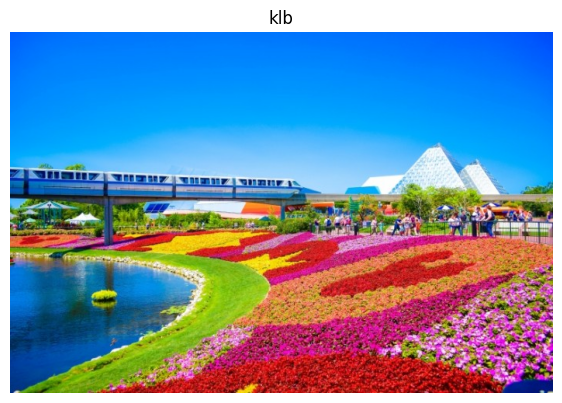

In [6]:
draw_picture(klumba, 'klb',bgr=False)

### 1. Получите данные и загрузите их в рабочую среду.

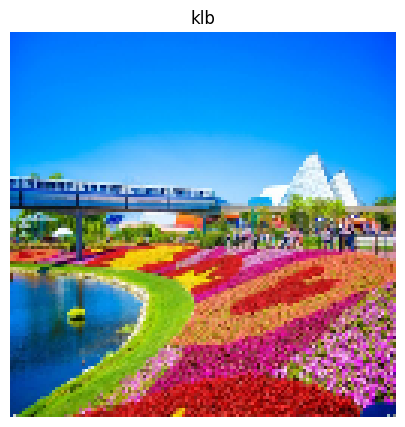

In [7]:
klumba = cv2.resize(klumba, (128, 128)) 
draw_picture(klumba, 'klb',bgr=False)

### 2. Реализуйте три модели класстеризации

#### 2a. KMeans

In [10]:
# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(klumba.shape)
assert d == 3
X = np.reshape(klumba, (w * h, d))

In [ ]:
X.shape

original: (128, 128, 3)
recreate: (128, 128, 3)
original: (128, 128, 3)
recreate: (128, 128, 3)
original: (128, 128, 3)
recreate: (128, 128, 3)
original: (128, 128, 3)
recreate: (128, 128, 3)


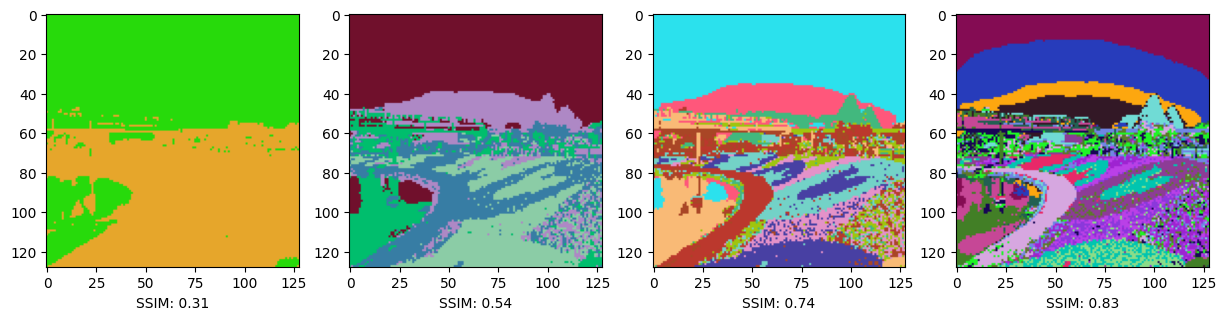

In [14]:
n_colors = 64
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
k_inertia = []
k_imeg = []
K = [2,5,10,20]
for ax, k in zip(axes,K):
    clf_kmeans = KMeans(n_clusters=k)
    w, h, d = original_shape = tuple(klumba.shape)
    clusters_kmeans = clf_kmeans.fit_predict(np.reshape(klumba, (w * h, d)))
    assert d == 3
    image_array = np.reshape(klumba, (w * h, d))
    codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
    k_inertia.append(clf_kmeans.inertia_)
    w, h, d = original_shape = tuple(klumba.shape)
    print('original:', klumba.shape)
    print('recreate:',recreate_image(clf_kmeans.cluster_centers_, clusters_kmeans, w, h).shape)
    ssim_const=ssim_const = ssim( recreate_image(clf_kmeans.cluster_centers_, clusters_kmeans, w, h), klumba,
                  data_range=klumba.max() - klumba.min(), multichannel=True)
    ax.set_xlabel(f'SSIM: {ssim_const:.2f}')
    ax.imshow((recreate_image(clf_kmeans.cluster_centers_, clusters_kmeans, w, h)*255).astype(np.uint8))


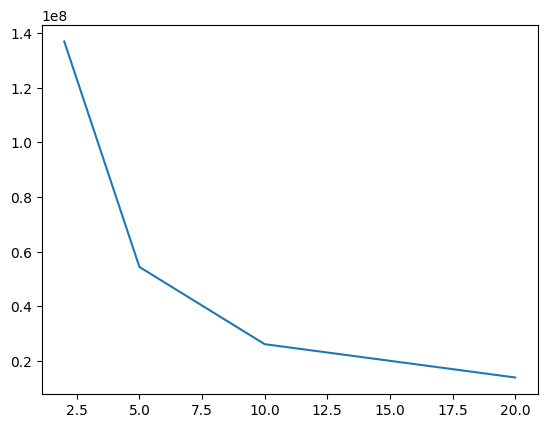

In [15]:
plt.plot(K, k_inertia)

#### 2b DBSCAN

In [113]:
w, h, d = original_shape = tuple(klumba.shape)
sh_klumba = np.reshape(klumba, (w * h, d))

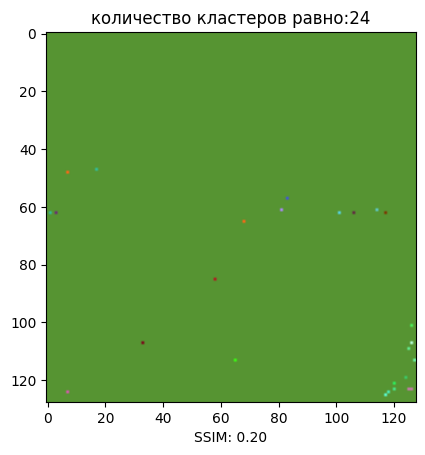

In [136]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=20, min_samples=1).fit(sh_klumba)
labels = clustering.fit_predict(sh_klumba)
new_klumba_of_dbscan = np.array([ np.append(dbscan_klumb,np.mean(sh_klumba[labels==un,:], axis=0), axis=0) for un in np.unique(clustering.labels_) ])
klustering_image = (recreate_image(new_klumba_of_dbscan, labels, w, h)*255).astype(np.uint8)
plt.imshow(klustering_image)
plt.title(f'количество кластеров равно:{len(np.unique(clustering.labels_))}')
ssim_const=ssim_const = ssim( klustering_image, klumba,
                  data_range=klumba.max() - klumba.min(), multichannel=True)
plt.xlabel(f'SSIM: {ssim_const:.2f}')
plt.show()


#### 2c AgglomerativeClustering

In [ ]:
klumba = cv2.imread('Klumba.jpg')
klumba = cv2.resize(klumba, (128, 128)) 
draw_picture(klumba, 'klb',bgr=False)

Fitting model on a small sub-sample of the data
done in 0.071s.
Predicting color indices on the full image (k-means)
done in 0.018s.
Predicting color indices on the full image (random)
done in 0.229s.


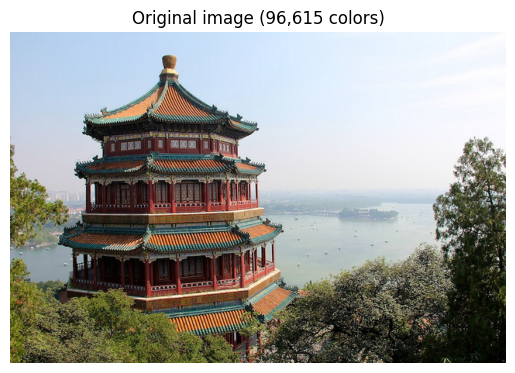

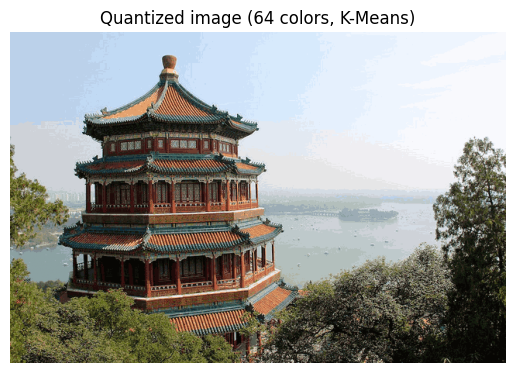

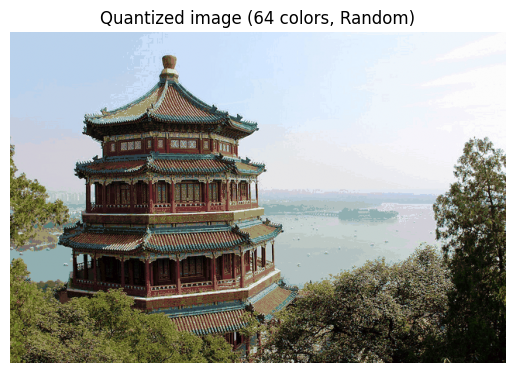

In [12]:
from time import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

n_colors = 64

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, n_init=3, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")


codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

In [13]:
n_colors

64